In [1]:
# installing libraies 

!pip install optuna 
!pip install lazypredict 

ERROR: Could not find a version that satisfies the requirement lazypredict (from versions: none)
ERROR: No matching distribution found for lazypredict


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xgboost (from versions: none)
ERROR: No matching distribution found for xgboost


In [5]:
# importing libraries 

import pandas as pd 
import numpy as np
import optuna
import os 

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.metrics import classification_report, f1_score



In [9]:
# Importing dataset 

data = pd.read_csv('mobile_data.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'mobile_data.csv'

In [ ]:
# Checking data for missing value 
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
# droping redundant column

data.drop(data.columns[0], axis=1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,707,0,0.5,0,0,1,16,0.1,194,2,...,1027,1508,1853,17,14,12,1,1,1,1
1,1444,1,2.1,1,0,0,6,0.9,103,1,...,1274,1340,712,17,5,10,0,0,0,0
2,1713,1,2.0,0,9,1,5,0.7,199,6,...,108,1963,1513,15,6,2,1,0,1,1
3,1408,1,2.1,1,10,0,45,0.9,89,5,...,613,1088,3952,8,6,3,0,0,1,3
4,1934,1,2.7,0,8,1,2,0.1,118,4,...,242,1127,2190,18,1,9,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1900,1,0.5,1,0,1,55,0.9,171,1,...,934,1241,3917,15,5,18,1,0,1,3
1496,1110,0,0.6,0,1,0,42,0.9,192,5,...,1179,1262,456,12,8,18,1,1,0,0
1497,1361,1,1.4,0,1,0,47,1.0,169,5,...,881,1382,2495,8,7,16,0,0,1,2
1498,980,1,0.5,0,0,1,33,0.9,160,6,...,1008,1758,2268,7,5,4,1,1,0,2


In [ ]:
# Split the data  
X = data.drop(columns=["price_range"])
y = data['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=23)


In [ ]:
# Scale the dataset 

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from lazypredict.Supervised import LazyClassifier

reg = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models,prediction = reg.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/32 [00:00<?, ?it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X).
ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for ExtraTreeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
FixedThresholdClassifier model failed to execute
FixedThresholdClassifier.__init__() missing 1 required positional argument: 'estimator'
ROC AUC couldn't be calculated

In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.97,0.97,None,0.97,0.03
LinearDiscriminantAnalysis,0.94,0.94,None,0.94,0.11
QuadraticDiscriminantAnalysis,0.92,0.92,None,0.92,0.02
XGBClassifier,0.90,0.90,None,0.90,0.57
BaggingClassifier,0.89,0.89,None,0.89,0.37
LGBMClassifier,0.89,0.89,None,0.89,0.92
NuSVC,0.87,0.87,None,0.87,0.19
ExtraTreesClassifier,0.85,0.85,None,0.85,0.81
RandomForestClassifier,0.85,0.85,None,0.85,0.47


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.metrics import confusion_matrix

In [ ]:
# Hyperparamital Optimazation 



#define parameter grid 
objective = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['1bfgs', 'saga'],
    'max_iter': [100,200,500]
}

#Initialize model 
Log_reg = LogisticRegression(random_state = 23, multi_class = 'multinomial')

# GridSearch setup 
grid_search = GridSearchCV(estimator=Log_reg, param_grid=objective,
                           scoring='f1_weighted', cv=5, n_jobs=-1, verbose=1)

# Fit to training data 
grid_search.fit(X_train, y_train)

# best model
best_logReg = grid_search.best_estimator_

# Predict and evaluate 
test_pred = best_logReg.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("F1 Score:", f1_score(y_test, test_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
F1 Score: 0.9766573302865751
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        78
           1       0.95      0.97      0.96        78
           2       0.97      0.95      0.96        74
           3       0.99      1.00      0.99        70

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Confusion Matrix:
 [[77  1  0  0]
 [ 0 76  2  0]
 [ 0  3 70  1]
 [ 0  0  0 70]]


In [ ]:
# define distribution of hyperparameter 
param_dist = {
    'penalty': ['l2'],
    'C': loguniform(0.001, 100),
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 200, 300, 500]
}

lr = LogisticRegression(random_state=23, multi_class='multinomial')

# setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lr, param_distributions=param_dist,
                             n_iter=30, scoring='f1_weighted',
                             cv=4, verbose=1, random_state=23, n_jobs=-1)

random_search.fit(X_train, y_train)

# evaluate best model 
best_lr = random_search.best_estimator_
test_pred = best_lr.predict(X_test)

print("Best Parameters:", random_search.best_params_)
print("F1 Score:", f1_score(y_test, test_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best Parameters: {'C': 51.38438515224637, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}
F1 Score: 0.9766573302865751
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        78
           1       0.95      0.97      0.96        78
           2       0.97      0.95      0.96        74
           3       0.99      1.00      0.99        70

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Confusion Matrix:
 [[77  1  0  0]
 [ 0 76  2  0]
 [ 0  3 70  1]
 [ 0  0  0 70]]


In [ ]:
# load libraries
from sklearn.model_selection import cross_val_score

def objective(trial):
    C = trial.suggest_loguniform('C', 0.001, 100)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'saga'])
    max_iter = trial.suggest_int('max_iter', 100, 500)

    # create model with suggested hyperparameters

    model = LogisticRegression(
        penalty= 'l2',
        C=C,
        solver=solver,
        max_iter=max_iter,
        multi_class="multinomial",
        random_state=42
    )

    # Cross-validation to evaluate performance
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, show_progress_bar=True)

# Get best trial
print("Best parameters:", study.best_params)
print("Best F1 Score (CV):", study.best_value)

[I 2025-06-21 14:10:17,241] A new study created in memory with name: no-name-5c2af028-8481-4df9-a3b0-a78ac30fbf7c


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-06-21 14:10:18,063] Trial 0 finished with value: 0.9331899710137931 and parameters: {'C': 1.0082140648855107, 'solver': 'saga', 'max_iter': 123}. Best is trial 0 with value: 0.9331899710137931.
[I 2025-06-21 14:10:18,151] Trial 1 finished with value: 0.5926264640390067 and parameters: {'C': 0.0017542150303776912, 'solver': 'lbfgs', 'max_iter': 222}. Best is trial 0 with value: 0.9331899710137931.
[I 2025-06-21 14:10:18,557] Trial 2 finished with value: 0.9373753798945333 and parameters: {'C': 1.2877901918674337, 'solver': 'saga', 'max_iter': 163}. Best is trial 2 with value: 0.9373753798945333.
[I 2025-06-21 14:10:18,741] Trial 3 finished with value: 0.9474264474811136 and parameters: {'C': 7.1775008526424635, 'solver': 'lbfgs', 'max_iter': 150}. Best is trial 3 with value: 0.9474264474811136.
[I 2025-06-21 14:10:18,897] Trial 4 finished with value: 0.9490997529181348 and parameters: {'C': 6.5380081996444765, 'solver': 'lbfgs', 'max_iter': 152}. Best is trial 4 with value: 0.94

In [ ]:
# Train best model with Optuna's best hyperparameters
best_params = study.best_params
best_model = LogisticRegression(
    penalty='l2',
    C=best_params['C'],
    solver=best_params['solver'],
    max_iter=best_params['max_iter'],
    multi_class='multinomial',
    random_state=23
)

# Fit and evaluate on test set
best_model.fit(X_train, y_train)
test_pred = best_model.predict(X_test)

print("F1 Score:", f1_score(y_test, test_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))


F1 Score: 0.9833344009761305
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        78
           1       0.97      0.97      0.97        78
           2       0.97      0.97      0.97        74
           3       0.99      1.00      0.99        70

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Confusion Matrix:
 [[77  1  0  0]
 [ 0 76  2  0]
 [ 0  1 72  1]
 [ 0  0  0 70]]


In [ ]:
study.best_params

{'C': 83.82364679476284, 'solver': 'saga', 'max_iter': 500}

In [ ]:
# Predict using best Optuna model
test_pred = best_model.predict(X_test)

# F1 Score
f1 = f1_score(y_test, test_pred, average='weighted')
print("Optuna F1 Score (test set):", f1)

Optuna F1 Score (test set): 0.9766573302865751


### ✅ Full Model Comparison Table (Completed)
Method	                Best Parameters	                                  F1 Score (Test Set)	Notes
Untuned	               Default LogisticRegression()	                          0.9670	      From LazyPredict
GridSearchCV	       C=100, max_iter=500, penalty='l2', solver='saga'       0.9767	      Thorough but time-consuming
RandomizedSearchCV	   C=51.38, max_iter=300, penalty='l2', solver='lbfgs'	  0.9767	      Faster than grid, similar result
Optuna	               C=70.44, max_iter=103, solver='lbfgs', penalty='l2'	  0.9833         ✅ Best	Smart, fastest, highest performance

In [ ]:

# Load your full training data
train_data = pd.read_csv("mobile_data.csv")
X_train = train_data.drop("price_range", axis=1)
y_train = train_data["price_range"]

# Load your new unlabeled test data
test_data = pd.read_csv("test_mobile_data.csv") 

# Train your Optuna-tuned model
best_model = LogisticRegression(
    penalty='l2',
    C=70.44,
    solver='lbfgs',
    max_iter=103,
    multi_class='multinomial',
    random_state=42
)
best_model.fit(X_train, y_train)

# Predict the price range
y_pred = best_model.predict(test_data)

# Save the predictions
output_data = test_data.copy()
output_data["y_pred"] = y_pred

# Optional: Save to CSV
submission_df = pd.DataFrame({
    'id': test_data.index,
    'price_range': y_pred
})

output_data.to_csv("submission11.csv", index=False)

# View sample predictions
print(output_data.head())


   Unnamed: 0  battery_power  blue  clock_speed  dual_sim  fc  four_g  \
0           0            772     1         1.20         1   7       1   
1           1           1137     1         1.00         0  18       0   
2           2           1884     0         2.10         1   7       1   
3           3           1991     1         2.70         0   5       1   
4           4           1066     0         0.60         0   2       1   

   int_memory  m_dep  mobile_wt  ...  px_height  px_width   ram  sc_h  sc_w  \
0           8   0.60        134  ...        552      1802   422     7     6   
1           7   1.00        196  ...        942      1179  3616    13     5   
2          43   0.80        185  ...        451       819  3619    14     8   
3          64   0.90        145  ...       1058      1325  1733     5     3   
4           7   0.90        114  ...       1242      1571   468    19    13   

   talk_time  three_g  touch_screen  wifi  y_pred  
0         15        1             

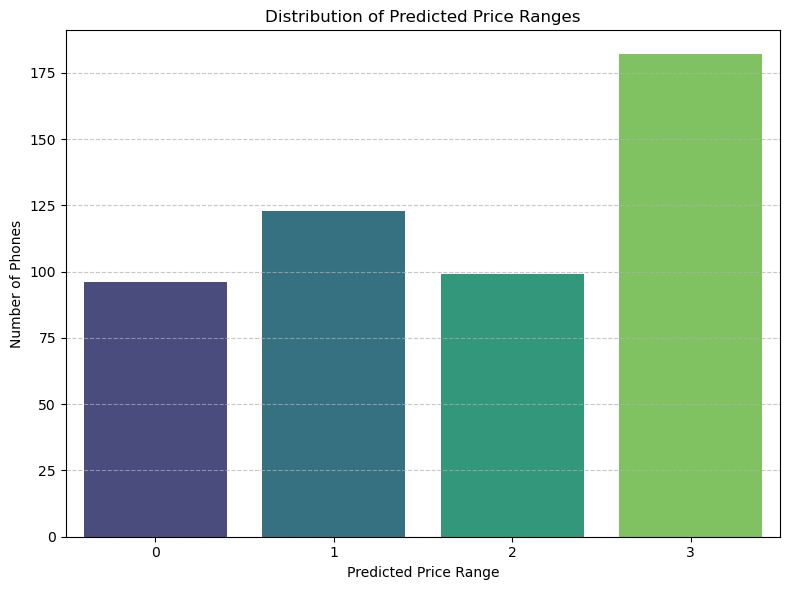

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `output_data` contains your test data + predictions
plt.figure(figsize=(8, 6))
sns.countplot(x="predicted_price_range", data=output_data, palette="viridis")

plt.title("Distribution of Predicted Price Ranges")
plt.xlabel("Predicted Price Range")
plt.ylabel("Number of Phones")
plt.xticks([0, 1, 2, 3])  # Assuming 4 price classes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
